### Description
### Background: 

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

Objective:

Statistical analysis of business data. Explore the dataset and extract insights from the data. The idea is for you to get comfortable with doing statistical analysis in Python.

You are expected to perform the statistical analysis to answer the following questions:

    1)Explore the dataset and extract insights using Exploratory Data Analysis.
    
    2)Do the users spend more time on the new landing page than the old landing page?
    
    3)Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater
      than the conversion rate for the old page?
    
    4)Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]
    
    5)Is the mean time spent on the new page same for the different language users?

*Consider a significance level of 0.05 for all tests.


### Data Dictionary:

1) user_id - This represents the user ID of the person visiting the website.

2) group - This represents whether the user belongs to the first group (control) or the second group (treatment).

3) landing_page - This represents whether the landing page is new or old.

4) time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.

5) converted - This represents whether the user gets converted to a subscriber of the news portal or not.

6) language_preferred - This represents the language chosen by the user to view the landing page.

In [2]:
# import libraries for data manipulation
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.

# import libraries for data visualization
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore') # Library will suppress warnings or deprecation notes 
import statistics

# import libraries to perform statistical function
import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

# for font styling
class color:
    GREEN = '\033[92m'
    BOLD = '\033[1m'
    END = '\033[0m'

In [5]:
# read the data
data=pd.read_csv('abtest.csv') 

In [3]:
# first five rows of the dataset
data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [6]:
# shape of the dataset
data.shape 

(100, 6)

#### Observations:

$\color{green}{\text{*The DataFrame has 100 rows and 6 columns as mentioned in the Data Dictionary. Data in each row corresponds to the actions taken by the visitor on the website.}}$

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Observations:

$\color{green}{\text{* Understanding of data types available in the dataset is very useful. It determines what values and operation it can perform. It appears that given dataset consists of  3 different types of data types i.e. int64, object & float64.}}$
    
$\color{green}{\text{* All columns have 100 observations and it also appears that there is no missing values in the dataset.}}$

$\color{green}{\text{*group, landing_page, converted and language_preferred should be categorical variables.}}$

In [7]:
# Keeping a clone of original dataframe df to prevent any changes in original data structure.
df=data.copy()

In [7]:
# coverting "objects" to "category" reduces the data space required to store the dataframe
# To convert 'group', 'landing_page', 'converted', 'language_preferred' into categorical data
# This is useful for model building

df['group'] = df.group.astype('category')
df['landing_page'] = df.landing_page.astype('category')
df['converted'] = df.converted.astype('category')
df['language_preferred'] = df.language_preferred.astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


#### Observations:
$\color{green}{\text{* By converting 'object' to 'category' we have reduced the usage of data space from 4.8+ KB to 2.6 KB.}}$

$\color{green}{\text{* The data type of 'group', 'landing_page', 'converted and 'language_preferred' have been changed from object to category using astype() funtion.}}$

In [8]:
df.describe(include='all')

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.000000,100,100,100.000000,100,100
unique,NaN,2,2,NaN,2,3
top,NaN,control,new,NaN,yes,French
freq,NaN,50,50,NaN,54,34
mean,546517.000000,NaN,NaN,5.377800,NaN,NaN
std,52.295779,NaN,NaN,2.378166,NaN,NaN
min,546443.000000,NaN,NaN,0.190000,NaN,NaN
25%,546467.750000,NaN,NaN,3.880000,NaN,NaN
50%,546492.500000,NaN,NaN,5.415000,NaN,NaN
75%,546567.250000,NaN,NaN,7.022500,NaN,NaN


#### Observations:
$\color{green}{\text{* Using describe() we got the important statistical information of the dataset. To visualize better I transposed the result view.}}$

$\color{green}{\text{* As per the above sample taken the group or landing_page has equal division of variables of control/treatment or old/new which is 50/50 respectively out of 100 observations.}}$

$\color{green}{\text{* The average time spent by the visitor from the above sample is 5.3378 with a standard deviation of 2.38.}}$

$\color{green}{\text{* Out of the total visitors on the page from the considered sample, the ratio of convertion is slightly higher which stands at 54 from the total sample of 100 .}}$

$\color{green}{\text{* The most preferred_language from the above sample is French as per the above table.}}$

## Q1) Explore the dataset and extract insights using Exploratory Data Analysis.

### Univariate Analysis

In [9]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Time spent on the page analysis

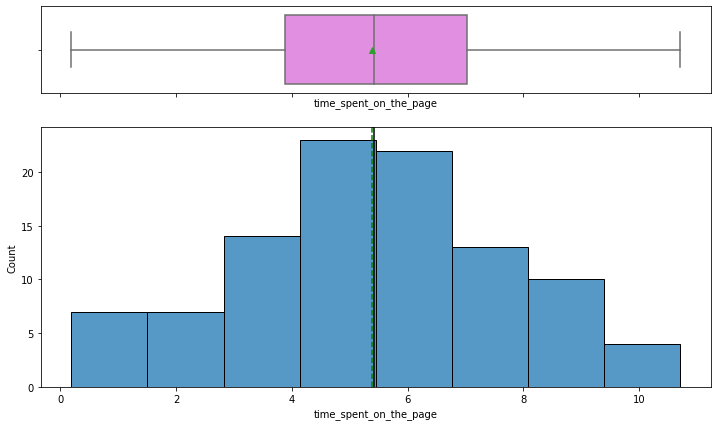

In [10]:
histogram_boxplot(df, 'time_spent_on_the_page')

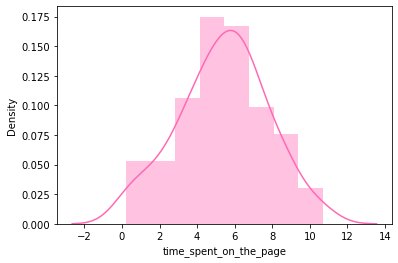

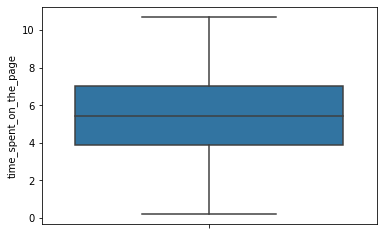

In [11]:
sns.distplot(df['time_spent_on_the_page'],color='hotpink')
plt.show()
sns.boxplot(y='time_spent_on_the_page',data=df)
plt.show()

In [12]:
import statistics

In [13]:
statistics.median(df['time_spent_on_the_page'])

5.415

### Observations
* The distribution of time spent on the page looks Normal.
* There are no outliers for time spent on the page.
* Median of the time_spent_on_the_page is 5.4 and Mean is around 5.4.  
* The distribution of time_spent_on_the_page is highest between 3.8 to 6.8, indicating maximum number of visitors spent time on page between these two time bands.

#### Landing Page analysis

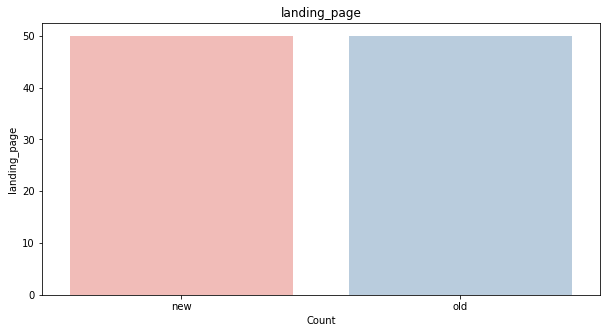

In [14]:
plt.figure(figsize=(10,5))
dow=df['landing_page'].value_counts()
sns.barplot(dow.index,dow,palette='Pastel1')
plt.xlabel('Count')
plt.title("landing_page")
plt.xticks(rotation=0);

### Observations
* The above barplot clearly states that there are equal number of old & new vistors on the landing page in the given data.

#### Converted analysis

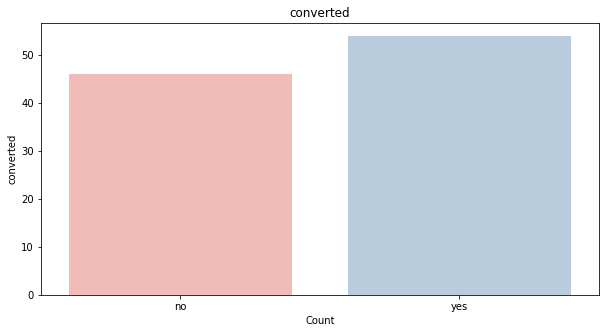

In [15]:
plt.figure(figsize=(10,5))
dow=df['converted'].value_counts()
sns.barplot(dow.index,dow,palette='Pastel1')
plt.xlabel('Count')
plt.title("converted")
plt.xticks(rotation=0);

### Observations
* The above barplot clearly states that in the given data the count of visitors who are converted are higher than the visitors who are not converted.

#### Language Preferred analysis

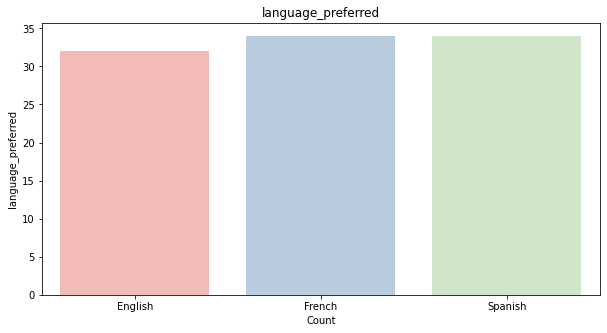

In [16]:
plt.figure(figsize=(10,5))
dow=df['language_preferred'].value_counts()
sns.barplot(dow.index,dow,palette='Pastel1')
plt.xlabel('Count')
plt.title("language_preferred")
plt.xticks(rotation=0);

### Observations
* The above barplot clearly states that the proportion of visitors who uses French and Spanish language are equal and also higher than English Language user.

#### Group analysis

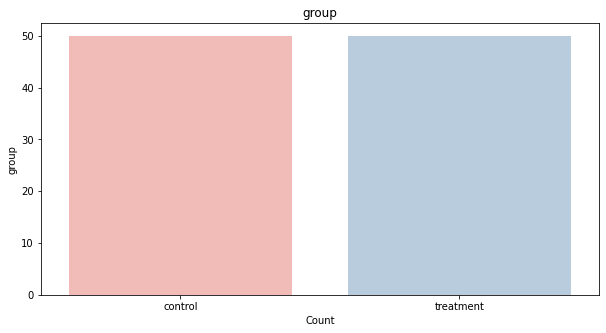

In [17]:
plt.figure(figsize=(10,5))
dow=df['group'].value_counts()
sns.barplot(dow.index,dow,palette='Pastel1')
plt.xlabel('Count')
plt.title("group")
plt.xticks(rotation=0);

### Observations
* Above barplot state that the count of both control and treatment are similar. Also we know from the brief that control and tretment are nothing but old and new Landing page simultaneously.

### Bivariate Analysis

#### Relationship between Landing page and Converted

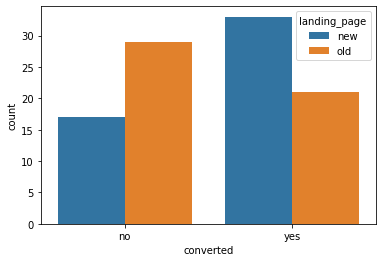

In [18]:
sns.countplot(df['converted'], hue = df['landing_page'])
plt.show()

### Observations
* The above countplot explains that the convertion ratio in the new landing page (treatment) has been higher than the old landing page (Control).
* Also the old landing Page (Control) has higher proportion of rejection than the convertion.

#### Relationship between Times spent on the page and Landing page

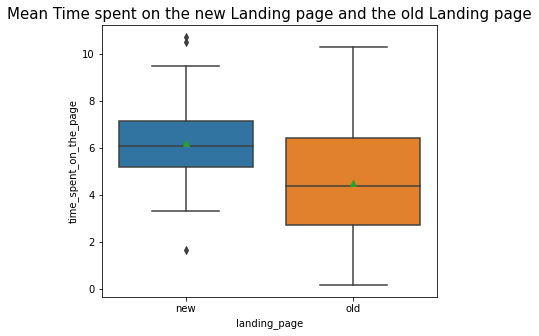

In [19]:
# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,5))
a = sns.boxplot(x= 'landing_page', y = 'time_spent_on_the_page' , data = df, showmeans=True)
a.set_title("Mean Time spent on the new Landing page and the old Landing page", fontsize=15)
plt.show()

### Observations
* The new landing page (Treatment) has few outliers on both the sides.
* The average Time spent on the new landing page (Treatment) is higher than on the Old Landing Page (Control)

#### Relationship between Times spent on the page and Language preferred

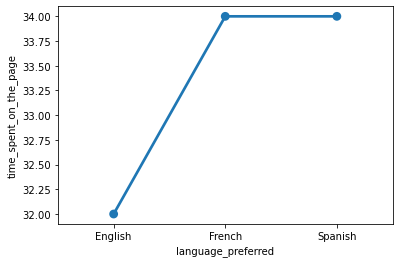

In [20]:
A = df.groupby(by=['language_preferred'])['time_spent_on_the_page'].count().reset_index().sort_values(['language_preferred'])
sns.pointplot(x='language_preferred', y='time_spent_on_the_page', ci= None, data = A)
plt.xticks(rotation=0)
plt.show()

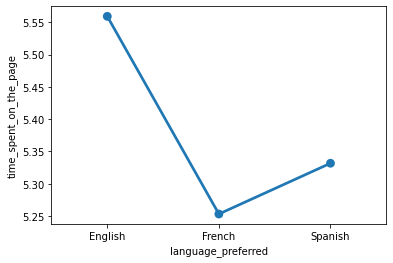

In [21]:
A = df.groupby(by=['language_preferred'])['time_spent_on_the_page'].mean().reset_index().sort_values(['language_preferred'])
sns.pointplot(x='language_preferred', y='time_spent_on_the_page', ci= None, data = A)
plt.xticks(rotation=0)
plt.show()

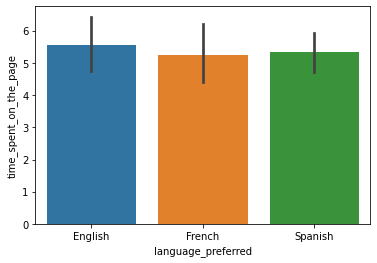

In [22]:
sns.barplot(df['language_preferred'],df['time_spent_on_the_page']);

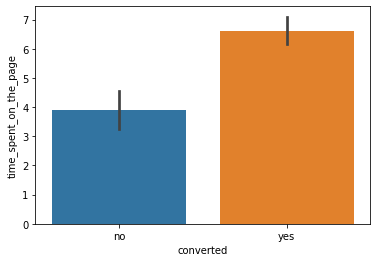

In [23]:
sns.barplot(df['converted'],df['time_spent_on_the_page']);

### Observations
* The above relationship has been explained using 3 graphs which shows 2 different observations
* French and Spanish has higher number of users at 34 each and English language users are slightly lesser at 30 in the given dataset.
* Though the number of users are higher for French and Spaish the average Time spent by the user on English is slightlt higher than the other two languages.

### Bivariate Scatter Plot

In [24]:
from sklearn.preprocessing import LabelEncoder #added this library to 

In [25]:
#data preparation for visualization
#transform dtypes from category/object to int/floats and add them as new variables in the dataset
df1 = data.copy()
le = LabelEncoder()
df1["landing_page_int"] = le.fit_transform(df1["landing_page"])
df1["converted_int"] = le.fit_transform(df1["converted"])
df1["language_preferred_int"] = le.fit_transform(df1["language_preferred"])
df1['user_id'] = df1.user_id.astype('category')
df1['group'] = df1.group.astype('category')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    category
 1   group                   100 non-null    category
 2   landing_page            100 non-null    object  
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    object  
 5   language_preferred      100 non-null    object  
 6   landing_page_int        100 non-null    int32   
 7   converted_int           100 non-null    int32   
 8   language_preferred_int  100 non-null    int32   
dtypes: category(2), float64(1), int32(3), object(3)
memory usage: 9.6+ KB


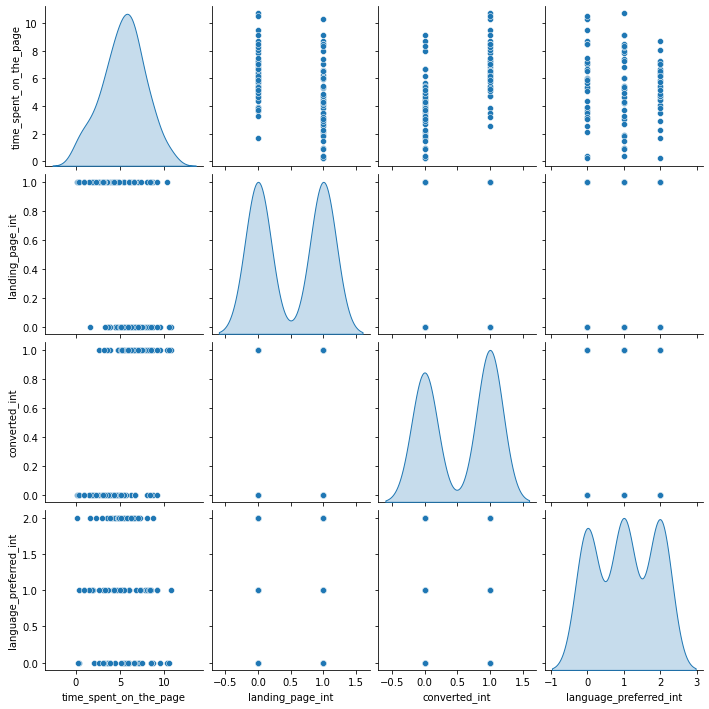

In [26]:
# pairplot 
sns.pairplot(data=df1, diag_kind="kde")
plt.show()

**Observations**

* There seems to be a strong relationship between time_spent_on_the_page with converted, landing_page and language_preferred

### Multivariate Analysis

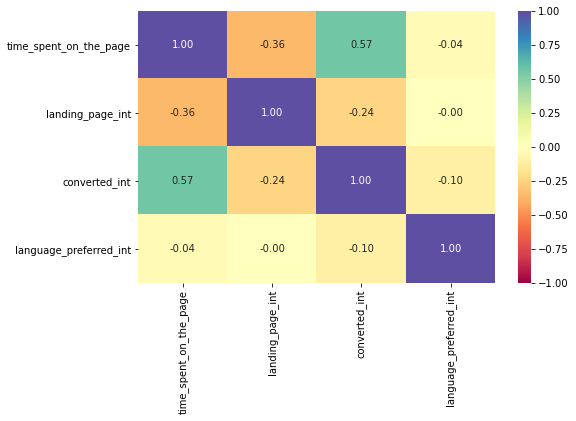

In [27]:
corr = df1.corr()

# plot the heatmap

plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

Observations:

1. Times spent on the page have a positive correlation with converted.
2. Factors influencing time spent on the page and landing page would need furthur investigation.  

#### Relationship between Language_prefered, Times spent on the page and Landing page

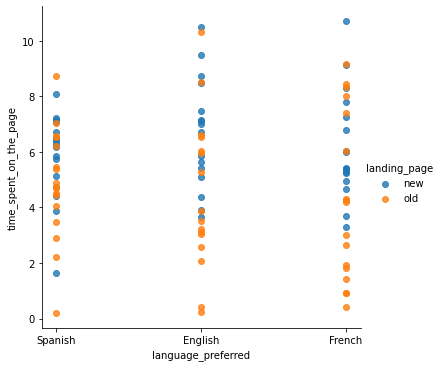

In [28]:
sns.lmplot(x='language_preferred',y='time_spent_on_the_page',data=df,fit_reg=False,hue='landing_page')
plt.show()

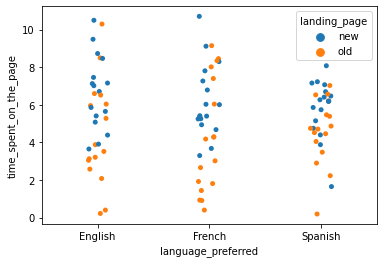

In [29]:
sns.stripplot(df['language_preferred'], df['time_spent_on_the_page'], df['landing_page'])
plt.show();

**Observations**

* The highest amount of time spent by a visitior is on French language which is from the new landing page (treatemnt). 
* Second highest is also from the new landing page (treatment) i.e. English Language.
* Time spent on the page by visitors on new landing page (treatment) seems to be higher than the old landing poage (control).

#### Relationship between Converted, Times spent on the page and Landing page

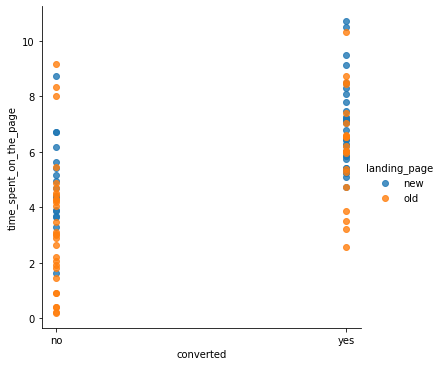

In [30]:
sns.lmplot(x='converted',y='time_spent_on_the_page',data=df,fit_reg=False,hue='landing_page')
plt.show()

#### Relationship between Language_prefered, Times spent on the page, Landing page and converted

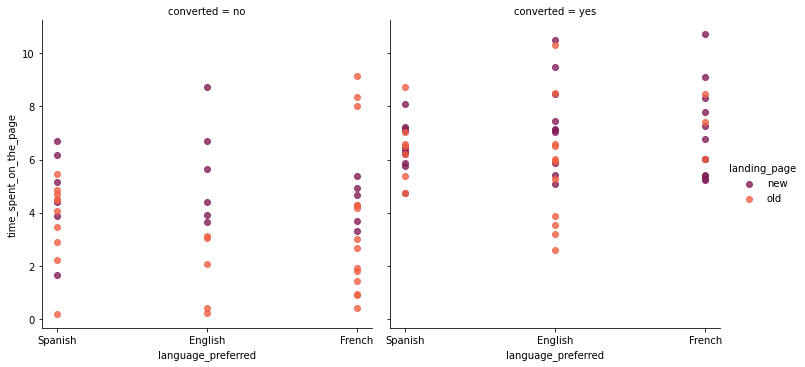

In [31]:
sns.lmplot(x='language_preferred',y='time_spent_on_the_page',data=df,fit_reg=False,hue='landing_page',col='converted',palette='rocket')
plt.show()

**Observations**

* From the above implots conversion ratio looks much higher on both new and old landing pages when the Time spent on the page is higher
* New landing page (treatment) users spent more time on the page and hence the conversion ratio is higher than the old landing page (control).

## Q2) Do the users spend more time on the new landing page than the old landing page?


### Data Preparation for the test

In [32]:
df_lang_new = df[df['landing_page']== 'new'] # creating individual data frames for new landing page and old landing page
df_lang_old = df[df['landing_page']== 'old']

In [33]:
df_lang_new.shape

(50, 6)

In [34]:
df_lang_new.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


In [35]:
df_lang_old.shape

(50, 6)

In [36]:
df_lang_old.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
3,546567,control,old,3.02,no,French
5,546558,control,old,5.28,yes,English
7,546581,control,old,6.53,yes,Spanish
9,546548,control,old,2.08,no,English


In [37]:
# Average time spent by users on the new landing page
new_landing_page_time_spent = df_lang_new.time_spent_on_the_page.mean()
# Average time spent by users on the old landing page
old_landing_page_time_spent = df_lang_old.time_spent_on_the_page.mean()

print('Average time spent by users on the new landing page is', new_landing_page_time_spent)
print()
print('Average time spent by users on the old landing page is', old_landing_page_time_spent)


Average time spent by users on the new landing page is 6.2232

Average time spent by users on the old landing page is 4.532400000000001


### Visual representation

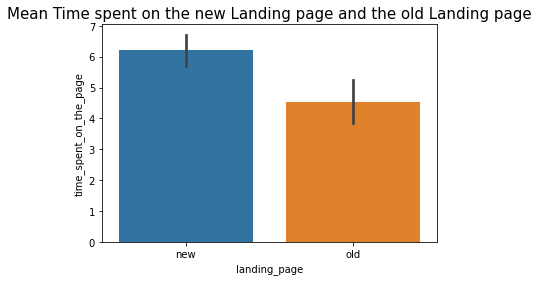

In [38]:
sns.barplot(df['landing_page'],df['time_spent_on_the_page']);
plt.title("Mean Time spent on the new Landing page and the old Landing page", fontsize=15)
plt.show()

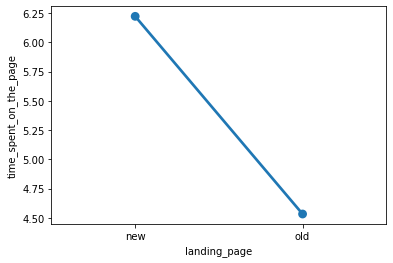

In [39]:
A = df.groupby(by=['landing_page'])['time_spent_on_the_page'].mean().reset_index().sort_values(['landing_page'])
sns.pointplot(x='landing_page', y='time_spent_on_the_page', ci= None, data = A)
plt.xticks(rotation=0)
plt.show()

### Observations

* From the above plots and the observations we can state that the mean time spent by the user on the new landing page is slightly higher than the old landing page. 
* Let's perform a hypothesis test to see if there are enough statistical evidence to show that the users spend more time on the new landing page than the old landing page


### Defining Null and alternative hypotheses

𝐻o: The mean time spent by user on the new landing page is equal to the mean time spent by user on the old landing page.

𝐻𝑎: The mean time spent by user on the new landing page is greater the mean time spent by user on the old landing page.

Let  𝜇1,𝜇2  be the mean time spent by on the new landing page and mean times spent on the old landing page respectively.

Mathematically, the above formulated hypotheses can be written as:

𝐻o:𝜇1=𝜇2

𝐻𝑎:𝜇1>𝜇2

### Level of Significance
* As given in the problem statement, we select  𝛼  = 0.05.

### Selecting Appropriate test

This is a case of a one-tailed two-sample mean test. As the two samples are not independent in this case, and also the population standard deviations are unknown, we shall use a paired t-test for this problem.

### Calculate the p-value

scipy.stats.ttest_rel calculates the t-test on TWO RELATED samples of observations. This function returns the test statistic and p-value for a right-tailed t-test as the alternative parameter is set to 'greater'.

In [40]:
test_stat, p_value = stats.ttest_rel(df_lang_new['time_spent_on_the_page'], df_lang_old['time_spent_on_the_page'], alternative = 'greater')  #Performing a paired t-test

print('The p-value is', p_value)

The p-value is 0.00029910900937037973


In [41]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.00029910900937037973 is less than the level of significance, we reject the null hypothesis.


### Conclusion

* At 5% significance level, we reject null hypothesis. Hence we do have enough statistical evidence to say that the mean time spent by user on the new landing page is greater than the mean time spent by users on the old landing page. 

## Q3) Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Data Preparation for the test

In [42]:
# number of users converted on new landing page
converted_new_page = df[df['landing_page']=='new'].converted.value_counts()['yes']
# number of users converted on old landing page
converted_old_page = df[df['landing_page']=='old'].converted.value_counts()['yes']

print('The numbers of users converted on new landing page and old landing page are {0} and {1} respectively'. format(converted_new_page, converted_old_page))

# Total number of users in new landing page
n_landing_page = df.landing_page.value_counts()['new']

# Total number of users in old landing page
o_landing_page = df.landing_page.value_counts()['old']

print('The total numbers of users on the new landing page and the old landing page are {0} and {1} respectively'.format(n_landing_page, o_landing_page))

The numbers of users converted on new landing page and old landing page are 33 and 21 respectively
The total numbers of users on the new landing page and the old landing page are 50 and 50 respectively


In [43]:
print(f' The proportions of users converted on new landing page and old landing page are {round(33/50,2)}, {round(21/50,2)} respectively')

 The proportions of users converted on new landing page and old landing page are 0.66, 0.42 respectively


### Visual representation

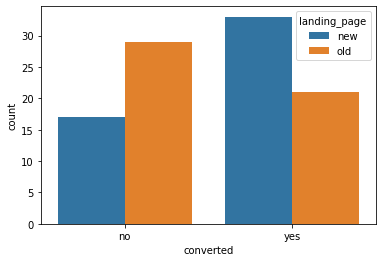

In [44]:
sns.countplot(df['converted'], hue = df['landing_page'])
plt.show()

#### Observation

* The above observation and the countplot implies that the proportion of users converted on new landing page are higher than the old landing page. 
* Let's conduct the test to see if this implies the same with the hypothesis test as well.

### Defining Null and Alternative hypotheses

𝐻o: The proportion of users who visit landing page and get converted for the new page is equal to the conversion rate of the old page

𝐻𝑎: The proportion of users who visit landing page and get converted for the new page is greater than the conversion rate of the old page

Let  𝜇1,𝜇2  be the proportion of the converted user on the new landing page and the proportion of the converted user on the old landing page respectively.

Mathematically, the above formulated hypotheses can be written as:

𝐻o:𝜇1=𝜇2

𝐻𝑎:𝜇1>𝜇2

### Level of Significance
* 𝛼 = 0.05.

### Selecting the Appropriate test

The formulated hypotheses are concerned with proportions. A test of proportions can be used to analyse the hypotheses and draw a conclusion. We shall use a Proportions Z test for this problem.

### Calculate the p-value

In [45]:
# import the required function
from statsmodels.stats.proportion import proportions_ztest

In [46]:
# find the p-value using proportion_ztest
stat, pval = proportions_ztest([converted_new_page, converted_old_page] , [n_landing_page, o_landing_page], alternative = 'larger')

# print the p-value
print('The p-value is '+ str(pval))

The p-value is 0.008026308204056278


In [47]:
# print the conclusion based on p-value
if pval < 0.05:
    print(f'As the p-value {pval} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pval} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Conclusion

* In this scenario, the p value is 0.008 which is lesser than the 0.05. Hence, we reject the null hypothesis.

* This means we have enough statistical evidence to say that the proportion of users who visit new landing page and get converted are greater than the user getting converted on the old page.

## Q4) Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

### Data Preparation for the test

In [9]:
chi_con = pd.crosstab(index=df['converted'], columns=df['language_preferred'], margins = True) #preparing a contingency table using pandas.crosstab() function
chi_con

language_preferred,English,French,Spanish,All
converted,,,,
no,11,19,16,46
yes,21,15,18,54
All,32,34,34,100


### Visual representation

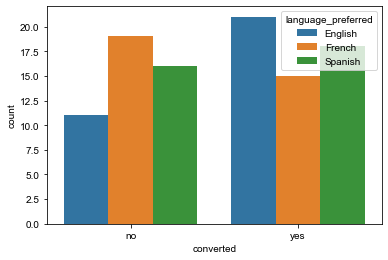

In [49]:
sns.countplot(df['converted'], hue = df['language_preferred'])
sns.set(rc = {'figure.figsize':(7,6)})
plt.show()

### Observations

* From the above data and the countplot, we cannot significantly infer whether the converted status depends on the prefered language or not. 
* If we consider only English as a language then yes we can infer that the converted status depends on the preferred English language.
* Let's perform a hypothesis test to see if there are enough statistical evidence on whether converted status depends on the prefered language or not.

### Defining Null and alternative hypotheses

We will test the null hypothesis:

𝐻o: converted status is independent of the preferred language

    
Against the alternate hypothesis:
    
𝐻𝑎: converted status depends on the preferred language


### Level of Significance
* 𝛼 = 0.05.

### Selecting Appropriate test

The formulated hypotheses can be tested using a Chi-square test of independence of attributes, concerning the two categorical variables, coberted and preferred language.

In [10]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(chi_con)
print('The p-value is', p_value)

The p-value is 0.7970832186581233


In [51]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.7970832186581233 is greater than the level of significance, we fail to reject the null hypothesis.


### Conclusion

* In this scenario, the p value is 0.797 which is greater than the 0.05, we fail to reject the null hypothesis. Hence we do not have enough statistical evidence to say that the converted status depends on the preferred language.

## Q5) Is the mean time spent on the new page same for the different language users?

In [52]:
new = df.copy()

In [53]:
# Creating a new DataFrame where landing page = new
new_df = new[new['landing_page']=='new']
new_df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


Here, time_spent_on_the_page is the response and language_preferred is the factor.

In [54]:
# get the levels of factor language_preferred
new_df['language_preferred'].value_counts()

French     17
Spanish    17
English    16
Name: language_preferred, dtype: int64

### Null and Alternative hypothesis

As per the above sample data the mean time of all the languages **are different** on the Landing page. Let's perform a hypothesis test to see if it is significantly different or not.

Let  𝜇1,𝜇2,𝜇3  be the means of time spent on the new landing page by English, Spanish and French language users respectively.

We will test the null hypothesis

𝐻0:𝜇1=𝜇2=𝜇3 

against the alternative hypothesis

𝐻𝑎:  At least mean time spent on the new landing page of one language is different from the rest.

### Level of Significance
* 𝛼 = 0.05.

### Data Preparation

In [55]:
mean_time_languages = (new_df.groupby(['language_preferred']).agg({'time_spent_on_the_page':['mean']})) ##Using groupby and agg function 
mean_time_languages.columns=['_'.join(col) for col in mean_time_languages.columns]         # To join the results from above group by and aggregated data
mean_time_languages

,time_spent_on_the_page_mean
language_preferred,
English,6.663750
French,6.196471
Spanish,5.835294


### Visual representation

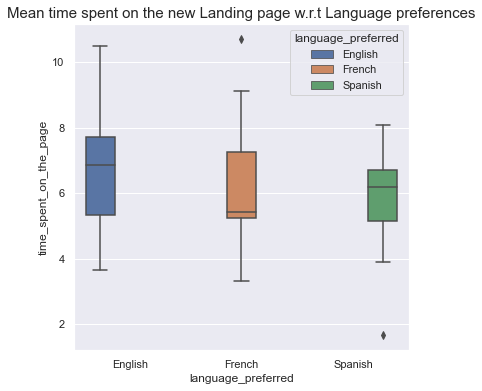

In [56]:
# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= 'language_preferred', y = 'time_spent_on_the_page' , data = new_df, hue = 'language_preferred')
a.set_title("Mean time spent on the new Landing page w.r.t Language preferences", fontsize=15)
plt.show()

### Observations

* From the above plot and data we can infer that the mean time spent on the new landing page are different for language users.
* Let's perform a hypothesis test to see if there are enough statistical evidences or not for our observations

Now, the normality and equality of variance assumptions need to be checked. 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on the new landing page follows a normal distribution against

Against the alternative hypothesis

>$H_a:$ Time spent on the new landing page does not follow a normal distribution

In [57]:
# Assumption 1: Normality
# find the p-value
w, p_value = stats.shapiro(new_df['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [58]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene

statistic, p_value = levene( new_df['time_spent_on_the_page'][new_df['language_preferred']=="English"], 
                                   new_df['time_spent_on_the_page'][new_df['language_preferred']=="Spanish"], 
                                   new_df['time_spent_on_the_page'][new_df['language_preferred']=="French"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

### Let's test whether the assumptions are satisfied or not
* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

### Calculate the P-Value

In [59]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, pvalue = f_oneway(new_df.loc[new_df['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              new_df.loc[new_df['language_preferred'] == 'Spanish', 'time_spent_on_the_page'],
                              new_df.loc[new_df['language_preferred'] == 'French', 'time_spent_on_the_page'])
print('The p-value is ' + str(pvalue))

The p-value is 0.43204138694325955


In [60]:
# print the conclusion based on p-value
if pvalue < 0.05:
    print(f'As the p-value {pvalue} is less than the level of significance, we r
          eject the null hypothesis.')
else:
    print(f'As the p-value {pvalue} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Conclusion

* As the p-value is much higher than the significance level, we fail to reject the null hypothesis. 
* Hence, we do have enough statistical evidence to conclude that the mean time spent by the users on the new landing page is same for different language users.

## Key overall observations 

* The average time spent by the user on the new landing page is 37% higher than the old landing page, this means that the new landing page is successful in engaging the user.
* The proportion of the convertion of user on the new landing page is whopping 57% higher than the old landing page.
* Though the sample data showed that the convertion status is slightly higher with the preferred languages, but statistically it does not hold.
* Though the mean time spent on the new landing page is different for the different language user in the sample data, but statistically it does not hold. Therefore it implies that different language user does not impact the time spent on the page.
* From the given data we can conclude that the new feature is significantly effective in increasing the subscribers for the channel.

## Key Insights
Further data will be required to observe the following:

* Flow of traffic data (From Search engines,web/app of the channel, direct advertisments, social meida etc...) will be required to anlayse where the actual flow of traffic is coming from and channelising the promotion plans to increase the subscriber base and the therefore the revenue for the channel.